# Analysing Data with Pandas

In this notebook we see stats about card types, color dependeces of attributes and how to print a card using scryfall.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests

In [2]:
# Importing the data

columns = pd.read_csv('../data/mtg_cards_data/datasets_vow_20211220_FULL.csv',nrows=0).columns
columns_with_obj_dtype = ['name','oracle_text','set','edhrec_rank','cmc_grp','usd','eur','tix',
               'normal_image','normal_image_1','normal_image_2','multiclass_colrs','multiclass_rarty',
               'multiclass_binusd','multiclass_bineur','multiclass_bintix']
dtype = {col: ('int8' if col not in columns_with_obj_dtype else 'object') for col in columns}

db = pd.read_csv('../data/mtg_cards_data/datasets_vow_20211220_FULL.csv',dtype=dtype)

In [3]:
db.head(5)

,name,cmc,oracle_text,set,flavor_text,edhrec_rank,prints,DFC,cmc_grp,usd,...,bineur_bronze,bineur_diamond,bineur_gold,bineur_platinum,bineur_silver,bintix_bronze,bintix_diamond,bintix_gold,bintix_platinum,bintix_silver
0,Bane of Progress,6,"When CARDNAME enters the battlefield, destroy ...",cc1,1,699,4,0,6_drop,4.06,...,0,0,1,0,0,1,0,0,0,0
1,"Freyalise, Llanowar's Fury",5,+2: Create a 1/1 green Elf Druid creature toke...,cc1,0,1586,5,0,5_drop,5.54,...,0,0,1,0,0,1,0,0,0,0
2,"Omnath, Locus of Mana",3,You don't lose unspent green mana as steps and...,cc1,1,2548,2,0,3_drop,5.7,...,0,0,1,0,0,1,0,0,0,0
3,Seedborn Muse,5,Untap all permanents you control during each o...,cc1,1,145,4,0,5_drop,8.71,...,0,0,0,1,0,1,0,0,0,0
4,Sol Ring,1,{T}: Add {C}{C}.,cc1,1,1,23,0,1_drop,7.91,...,0,0,1,0,0,1,0,0,0,0


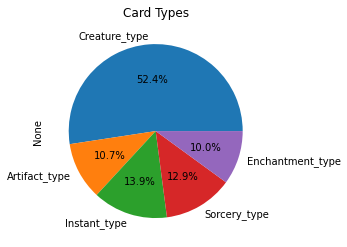

In [4]:
# card type distribution

db[['Creature_type','Artifact_type','Instant_type','Sorcery_type','Enchantment_type']].sum().plot.pie(autopct='%1.1f%%',title='Card Types')

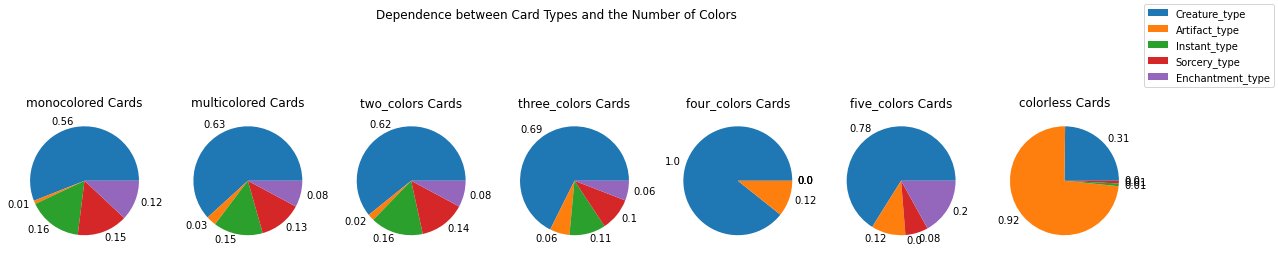

In [6]:
# card type distribution per color

j = 0
fig,ax = plt.subplots(1,7)
for i in ['monocolored','multicolored','two_colors','three_colors','four_colors','five_colors','colorless']:
    x = db[db[i] == 1][['Creature_type','Artifact_type','Instant_type','Sorcery_type','Enchantment_type']].sum().div(len(db[db[i] == 1])).round(2)
    wedges, texts = ax[j].pie(x,labels=x)
    ax[j].set_title(i + ' Cards')
    j = j+1
    
fig.legend(['Creature_type','Artifact_type','Instant_type','Sorcery_type','Enchantment_type'])
fig.set_size_inches(20,5)
fig.suptitle('Dependence between Card Types and the Number of Colors')
plt.show()

In [7]:
#top attributes per color combination

color_comb = ['colors_B','colors_BG','colors_BGR','colors_BGRU','colors_BGRUW','colors_BGRW','colors_BGU','colors_BGUW','colors_BGW','colors_BR','colors_BRU','colors_BRUW','colors_BRW','colors_BU','colors_BUW','colors_BW','colors_Colorless','colors_G','colors_GR','colors_GRU','colors_GRUW','colors_GRW','colors_GU','colors_GUW','colors_GW','colors_R','colors_RU','colors_RUW','colors_RW','colors_U','colors_UW','colors_W']
list_attr = ['counterspell','manarock','manadork','removal','wrath','ramp','tutor','cardraw','burn','discard','enters_bf','die_trigger','attack_trigger','pseudo_ramp','static_ramp','creature_tokens','extra_turn','plus1_counters','graveyard_hate','free_spells','bounce_spell','sac_outlet','sac_payoff','cant_counter','costx_more','costx_moreactivate','costx_less','costx_lessacitivate','whenever_opp','returnfrom_gy','reanimation','castfrom_gy','lord','upkeep_trigger','endstep_trigger','landfall','combat_trigger','life_gain','treasure_tokens','protection','cost_reduction','mana_multipliers','card_selection','whenever_cast','gain_control','unblockeable','difficult_block','create_copy','milling','trigger_multiplier','untapper','static_effects','damage_multipliers','variable_pt','agressive','doublers','blinker','graveyard_tutor','play_toplibrary','life_lose','play_from_graveyard','infect','disenchant','venture','animator','wish','gy_synergies','looting_similar','cheatinto_play','pumped_foreach','ritual','no_maximum','wheel','extra_combat','ghostly_prison','land_destruction','win_game','lose_game','cant_lose']

mtg_cards_attr = db[color_comb + list_attr]

for i in color_comb:
    x = mtg_cards_attr[mtg_cards_attr[i] == 1][list_attr].sum().div(len(mtg_cards_attr[mtg_cards_attr[i] == 1]))
    y = mtg_cards_attr[list_attr].sum().div(len(mtg_cards_attr))
    top_attr = x-y.sort_values(ascending=False).head(5)
    print('Color Combination: ' + i)
    print(x[top_attr > 0].round(2))
    print()

Color Combination: colors_B
removal            0.16
difficult_block    0.20
dtype: float64

Color Combination: colors_BG
removal            0.14
creature_tokens    0.13
dtype: float64

Color Combination: colors_BGR
removal            0.15
enters_bf          0.19
creature_tokens    0.25
difficult_block    0.31
dtype: float64

Color Combination: colors_BGRU
cardraw    0.5
dtype: float64

Color Combination: colors_BGRUW
cardraw            0.12
difficult_block    0.38
dtype: float64

Color Combination: colors_BGRW
enters_bf          0.5
creature_tokens    0.5
dtype: float64

Color Combination: colors_BGU
cardraw            0.34
enters_bf          0.23
difficult_block    0.29
dtype: float64

Color Combination: colors_BGUW
difficult_block    0.67
dtype: float64

Color Combination: colors_BGW
removal            0.11
cardraw            0.14
enters_bf          0.31
creature_tokens    0.17
dtype: float64

Color Combination: colors_BR
removal            0.22
enters_bf          0.16
difficult_bloc

In [11]:
# Dependences of Attributes to main colors 

color_comb = ['colors_B','colors_G','colors_R','colors_U','colors_W']
x= pd.DataFrame([db[db[c] == 1][list_attr].mean() for c in color_comb],index = color_comb, columns = list_attr)

for c in color_comb:
    print('Relevant Attributes of '+c+':\n')
    for a in list_attr:
        if (x.at[c,a] > x[a].mean()+ x[a].var() and x.at[c,a] >= 0.05):
            print(a + ': ',x.at[c,a])
    print('\n \n')

Relevant Attributes of colors_B:

removal:  0.15961867514055242
discard:  0.0684429234905891
die_trigger:  0.07015399657785383
sac_outlet:  0.05719872891713518
life_gain:  0.11733072598386703
difficult_block:  0.20117330725983867
static_effects:  0.057687606942067954
life_lose:  0.07748716695184552

 

Relevant Attributes of colors_G:

ramp:  0.05914231856738925
enters_bf:  0.18119698397737982
creature_tokens:  0.10391140433553252
plus1_counters:  0.13077285579641848

 

Relevant Attributes of colors_R:

removal:  0.2169811320754717
burn:  0.20531281032770607
agressive:  0.10203574975173783

 

Relevant Attributes of colors_U:

counterspell:  0.09479140952851148
cardraw:  0.2317946186126882
bounce_spell:  0.10145643051098494
difficult_block:  0.20217230313502838

 

Relevant Attributes of colors_W:

enters_bf:  0.1921313058170408
creature_tokens:  0.1018585566014965
plus1_counters:  0.06879073135409124
life_gain:  0.12985759111754766
protection:  0.07723871590634805
difficult_block:  0

Randomly chosen card:


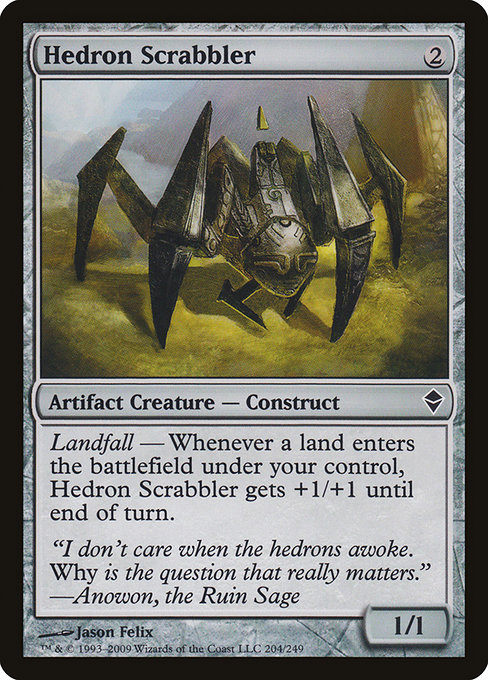

Attributes:


name                                                        Hedron Scrabbler
cmc                                                                        2
oracle_text                Landfall — Whenever a land enters the battlefi...
set                                                                      zen
flavor_text                                                                1
edhrec_rank                                                            16931
prints                                                                     1
cmc_grp                                                               2_drop
usd                                                                     0.05
eur                                                                     0.02
tix                                                                     0.03
Landfall                                                                   1
abilities_count                                                            1

In [8]:
#print a card togehter with it char. attributes

x = db.loc[np.random.randint(0,len(db))]
print('Randomly chosen card:')
im = Image.open(requests.get(x['normal_image'], stream=True).raw)
display(im)
print('Attributes:')
x.iloc[x.to_numpy().nonzero()]